In [39]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.fftpack import dct,idct

In [40]:
# define functions for dct and idct

def imdct(subimage):
    dct_im = dct(dct(subimage,axis=0,norm='ortho'),axis=1,norm='ortho')
    return dct_im

def imidct(dsubimage):
    idct_im = idct(idct(dsubimage,axis=0,norm='ortho'),axis=1,norm='ortho')
    return idct_im

In [41]:
image = cv2.imread('cat.png',0)
sh = image.shape

In [42]:
N = 8
image_dct = np.zeros((sh[0],sh[1]),dtype=int)

for row in range(sh[0]//N):
    for col in range(sh[1]//N):
        temp = imdct(image[row*N:(row+1)*N,col*N:(col+1)*N])
        image_dct[row*N:(row+1)*N,col*N:(col+1)*N] = temp

No of pixels in Image 359170
No of Non zero values in compressed image: 8190
Compression Ratio: 43.85470085470085


Text(0.5, 1.0, 'IDCT of Image')

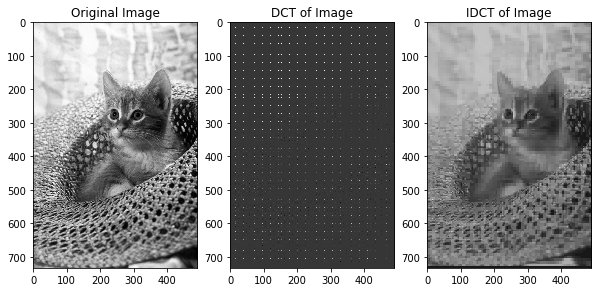

In [58]:
th = 100
image_comp = np.zeros((sh[0],sh[1]),dtype=int)

for row in range(sh[0]):
    for col in range(sh[1]):
        if image_dct[row,col]<th:
            image_comp[row,col] = 0
        else:
            image_comp[row,col] = image_dct[row,col]
            
            
image_idct = np.zeros((sh[0],sh[1]),dtype=int)

for row in range(sh[0]//N):
    for col in range(sh[1]//N):
        temp = imidct(image_comp[row*N:(row+1)*N,col*N:(col+1)*N])
        image_idct[row*N:(row+1)*N,col*N:(col+1)*N] = temp
        

nonzeros = np.sum([image_comp!=0])
print('No of pixels in Image',sh[0]*sh[1])
print('No of Non zero values in compressed image:',nonzeros)
CR = (sh[0]*sh[1])/nonzeros
print('Compression Ratio:',CR)

plt.figure(figsize=(10,10))        
plt.subplot(1,3,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(image_dct,cmap='gray')
plt.title('DCT of Image')
plt.subplot(1,3,3)
plt.imshow(image_idct,cmap='gray')
plt.title('IDCT of Image')

Conclusion: -

If all the DCT co-efficients are retained than inverse DCT of the image and original image are the same.

To achieve image compression some of the DCT co-efficients can be reduced to 0. Such co-efficients are not stored, to save storage capacity. In such a case quality of inverse DCT of image depends on the threshold.

If threshold is increased than the quality of image deteriorates and compression ratio increases.